### **Deep Neural Network**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Train.csv')
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


##### Drop kolom yang tidak perlu (yang tidak berhubungan dengan target)

In [3]:
df2 = df.drop(columns=['ID', 'Warehouse_block'])
df2

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,Flight,4,2,177,3,low,F,44,1233,1
1,Flight,4,5,216,2,low,M,59,3088,1
2,Flight,2,2,183,4,low,M,48,3374,1
3,Flight,3,3,176,4,medium,M,10,1177,1
4,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...
10994,Ship,4,1,252,5,medium,F,1,1538,1
10995,Ship,4,1,232,5,medium,F,6,1247,0
10996,Ship,5,4,242,5,low,F,4,1155,0
10997,Ship,5,2,223,6,medium,M,2,1210,0


##### Mengubah data kategorikal menjadi numerik menggunakan Ordinal Encoder

In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
oe = OrdinalEncoder()
df2['Mode_of_Shipment'] = oe.fit_transform(df[['Mode_of_Shipment']])
df2['Product_importance'] = oe.fit_transform(df[['Product_importance']])
df2['Gender'] = oe.fit_transform(df[['Gender']])
df2

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,0.0,4,2,177,3,1.0,0.0,44,1233,1
1,0.0,4,5,216,2,1.0,1.0,59,3088,1
2,0.0,2,2,183,4,1.0,1.0,48,3374,1
3,0.0,3,3,176,4,2.0,1.0,10,1177,1
4,0.0,2,2,184,3,2.0,0.0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...
10994,2.0,4,1,252,5,2.0,0.0,1,1538,1
10995,2.0,4,1,232,5,2.0,0.0,6,1247,0
10996,2.0,5,4,242,5,1.0,0.0,4,1155,0
10997,2.0,5,2,223,6,2.0,1.0,2,1210,0


In [6]:
x = df2.drop('Reached.on.Time_Y.N', axis=1) # feature
y = df2['Reached.on.Time_Y.N'] # target

### **Data Split**

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

##### Untuk mengetahui panjang X train test dan Y train test

In [8]:
print(f'Panjang X Train: {len(x_train)}')
print(f'Panjang X Test: {len(x_test)}')
print(f'Panjang Y Train: {len(y_train)}')
print(f'Panjang Y Train: {len(y_test)}')

Panjang X Train: 7699
Panjang X Test: 3300
Panjang Y Train: 7699
Panjang Y Train: 3300


### **Modelling Data dengan Sequential Model**

In [9]:
from keras import Sequential
from keras.layers import Dense, Flatten

In [10]:
model = Sequential()

model.add(Dense(units=9, input_shape=[9], activation='relu')) # Input Layer dan Hidden Layer
model.add(Dense(units=1, activation='sigmoid')) # Output Layer

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 100 (400.00 Byte)
Trainable params: 100 (400.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Total parameter mencerminkan jumlah parameter (bobot dan bias) dalam seluruh model. Dalam kasus ini, terdapat total 100 parameter yang dapat diatur selama pelatihan (trainable parameters), dan tidak ada parameter yang tetap (non-trainable parameters).

### **Model Compile**

In [13]:
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

In [14]:
model.compile (
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

### **Proses Training**

In [15]:
train = model.fit(
    x_train, y_train, 
    epochs=50, 
    validation_split=0.2,
)

Epoch 1/50
193/193 [==============================] - 4s 7ms/step - loss: 17.5487 - accuracy: 0.5175 - val_loss: 3.0307 - val_accuracy: 0.4857
Epoch 2/50
193/193 [==============================] - 1s 6ms/step - loss: 0.9819 - accuracy: 0.6097 - val_loss: 1.0494 - val_accuracy: 0.5779
Epoch 3/50
193/193 [==============================] - 1s 6ms/step - loss: 0.8576 - accuracy: 0.6097 - val_loss: 0.6717 - val_accuracy: 0.5773
Epoch 4/50
193/193 [==============================] - 1s 7ms/step - loss: 0.8742 - accuracy: 0.6134 - val_loss: 0.7103 - val_accuracy: 0.6565
Epoch 5/50
193/193 [==============================] - 1s 7ms/step - loss: 0.9781 - accuracy: 0.6165 - val_loss: 1.0268 - val_accuracy: 0.6526
Epoch 6/50
193/193 [==============================] - 1s 6ms/step - loss: 1.0911 - accuracy: 0.6191 - val_loss: 1.2755 - val_accuracy: 0.5805
Epoch 7/50
193/193 [==============================] - 1s 6ms/step - loss: 0.9239 - accuracy: 0.6202 - val_loss: 0.7143 - val_accuracy: 0.5805
Epoch

model ini tidak mengalami overfitting maupun underfitting. Karena memiliki nilai accuracy dan val_accuracy yang tidak jauh berbeda. (accuracy : 0.6180) dan (val_accuracy : 0.6643).

### **Evaluasi Model**

In [16]:
model.evaluate(x_test, y_test)

104/104 [==============================] - 1s 5ms/step - loss: 0.5556 - accuracy: 0.6542


[0.5555552840232849, 0.6542423963546753]

Loss : 0.5556, mengindikasikan seberapa baik model mendekati target yang sebenarnya. Semakin rendah nilai loss, semakin baik performa model. Dalam kasus ini, loss sebesar 0.5556 mungkin menunjukkan bahwa model masih memiliki ruang untuk perbaikan.

Accuracy : 0.6542, mengindikasikan bahwa model dengan akurasi sekitar 65.42% mampu melakukan prediksi yang benar pada data pengujian. Semakin tinggi nilai akurasi, semakin baik performa model.

[0.5555552840232849, 0.6542423963546753] adalah hasil dari metrik loss dan akurasi pada data pengujian. Dalam kasus ini,  pelatihan model sudah cukup baik dilihat dari nilai accuracy yang lebih tinggi dibanding dengan nilai loss nya. 

### **Grafik Pergerakan Metrik**

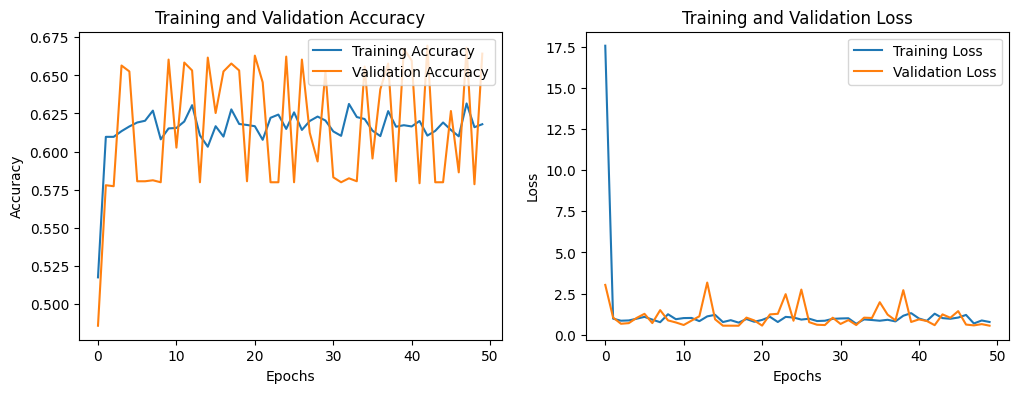

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Training Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Training Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()